In [8]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial as Poly
import math

fK1 = -0.5
fK2 = -0.2
polyR = Poly((0, 1.0, 0, fK1, 0, fK2))
polyDR = polyR.deriv()

aRoots = polyDR.roots()
print(aRoots)
aRoots_real = aRoots[aRoots.imag == 0.0].real
print(aRoots_real)
aRoots_pos = aRoots_real[aRoots_real > 0.0]
print(aRoots_pos)

fX_zero = np.min(aRoots_pos)

[-7.07106781e-01+0.j         -2.77642306e-16-1.41421356j
 -2.77642306e-16+1.41421356j  7.07106781e-01+0.j        ]
[-0.70710678  0.70710678]
[0.70710678]


0.7000000000000001


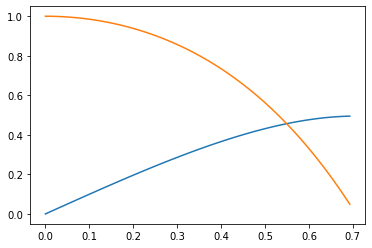

In [45]:
from matplotlib import pyplot as plt


fX_max = math.floor(fX_zero * 1e2) * 1e-2
print(fX_max)
iStepCnt = 100

# Eval poly at points
aX = np.arange(0, fX_max, fX_max / iStepCnt)
# print(aX)

plt.plot(aX, polyR(aX))
plt.plot(aX, polyDR(aX))

[ 5.65504705e+06 -1.46827258e+07  1.64665146e+07 -1.04409984e+07
  4.11447927e+06 -1.04315673e+06  1.70290008e+05 -1.74050400e+04
  1.04570466e+03 -3.25641017e+01  1.40189292e+00 -7.58500060e-04]


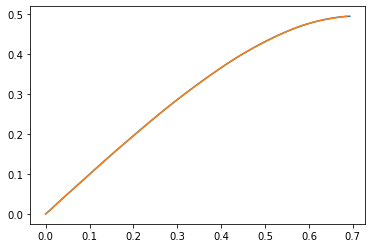

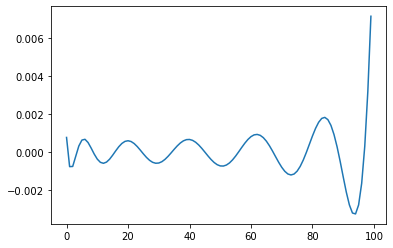

In [47]:
aY = polyR(aX)

# Fit inverse polynomial
aFit = np.polyfit(aY, aX, deg=11)
print(aFit)
polyFit = Poly(aFit[::-1])

plt.plot(aX, polyR(aX))
plt.plot(polyFit(aY), aY)

plt.figure()
plt.plot(aX - polyFit(polyR(aX)))

# print(fX_max)
# print("{} = {}".format(aX[-1], polyFit(polyR(aX[-1]))))
# print("{} = {}".format(aX[-2], polyFit(polyR(aX[-2]))))